# Madrid AirBnB data analysis

In [68]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

First step is loading the data in a dataframe structure. For more information on the source of the data please check the README.md file

In [69]:
df = pd.read_csv('../data files/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.86,4.84,4.86,NaN,f,1,0,1,0,0.63
1,21853,https://www.airbnb.com/rooms/21853,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,NaN,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.30
2,24805,https://www.airbnb.com/rooms/24805,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,NaN,"The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,4.97,5.00,4.76,NaN,f,1,1,0,0,0.30
3,26825,https://www.airbnb.com/rooms/26825,20231215032748,2023-12-15,city scrape,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,NaN,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.72,4.73,4.77,NaN,f,1,0,1,0,1.18
4,30320,https://www.airbnb.com/rooms/30320,20231215032748,2023-12-15,previous scrape,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,1.05


In [70]:
#general overview of data
display(df.describe())
print('The dataframe has:\n{} rows\n{} columns'.format(df.shape[0], df.shape[1]))


,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.554300e+04,2.554300e+04,0.0,2.554300e+04,25532.000000,25532.000000,25543.000000,25543.000000,25543.000000,0.0,...,20213.000000,20214.000000,20215.000000,20212.000000,20211.000000,25543.000000,25543.000000,25543.000000,25543.000000,20176.000000
mean,4.159907e+17,2.023122e+13,NaN,2.172925e+08,34.318933,43.285916,40.421413,-3.694003,3.126727,NaN,...,4.666852,4.750049,4.759503,4.746825,4.555557,25.094272,19.962377,4.825353,0.269389,1.815256
std,4.324774e+17,6.336062e+00,NaN,1.833059e+08,96.321905,153.188924,0.023543,0.027755,1.920497,NaN,...,0.474094,0.431077,0.443542,0.394859,0.508168,58.120244,52.098890,27.827891,2.581711,1.917428
min,6.369000e+03,2.023122e+13,NaN,1.366000e+04,1.000000,1.000000,40.331397,-3.835330,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.114862e+07,2.023122e+13,NaN,4.087799e+07,1.000000,2.000000,40.409381,-3.707390,2.000000,NaN,...,4.570000,4.700000,4.720000,4.670000,4.450000,1.000000,0.000000,0.000000,0.000000,0.380000
50%,5.397609e+07,2.023122e+13,NaN,1.685328e+08,3.000000,4.000000,40.420240,-3.701070,2.000000,NaN,...,4.800000,4.860000,4.890000,4.880000,4.670000,3.000000,1.000000,0.000000,0.000000,1.190000
75%,8.698655e+17,2.023122e+13,NaN,3.991669e+08,18.000000,22.000000,40.431466,-3.685610,4.000000,NaN,...,4.950000,5.000000,5.000000,4.990000,4.840000,14.000000,7.000000,1.000000,0.000000,2.660000
max,1.046255e+18,2.023122e+13,NaN,5.507133e+08,2461.000000,5521.000000,40.535530,-3.545904,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,291.000000,291.000000,268.000000,39.000000,30.600000


The dataframe has:
25543 rows
75 columns


This dataframe has more than 25K entries. Each of them corresponding to an AirBnB listing that can be a full apartment, a single room or other.

Next an analysis of the NaN values is performed to see if some columns can be droped. Four columns ('description', 'bathrooms', 'bedrooms', 'calendar_updated') had only NaN values and are dropped. Also there are a few columns that are not relevant for the study. These columns refer to urls of the listings, dates on when the data was scraped and from where it was scraped.

In [71]:
# NaN analysis

# Check columns with Nan values
nans_columns = df.isnull().mean()
print('Percentaje of missing values per column:\n{}'.format(nans_columns.sort_values(ascending=False).head(10)))

# Drop columns that are all NaN
df_new = df.dropna(how='all', axis=1)

print('After droping the columns, the new dataframe has:\n{} rows\n{} columns'.format(df_new.shape[0], df_new.shape[1]))

Percentaje of missing values per column:
bedrooms                 1.000000
calendar_updated         1.000000
description              1.000000
bathrooms                1.000000
license                  0.891007
host_neighbourhood       0.595545
host_about               0.521630
neighborhood_overview    0.485691
neighbourhood            0.485691
host_location            0.303684
dtype: float64
After droping the columns, the new dataframe has:
25543 rows
71 columns


## Question 1: How are the listings distributed?
Which neighborhoods have the most listings? Who is the owner of the listings?

neighbourhood_group_cleansed
Centro                10878
Salamanca              1729
Chamberí               1716
Tetuán                 1416
Arganzuela             1277
Carabanchel             918
Retiro                  885
Ciudad Lineal           841
Chamartín               786
Puente de Vallecas      738
Name: count, dtype: int64
The top 10 neighbourhoods account for 82.93% of the total listings


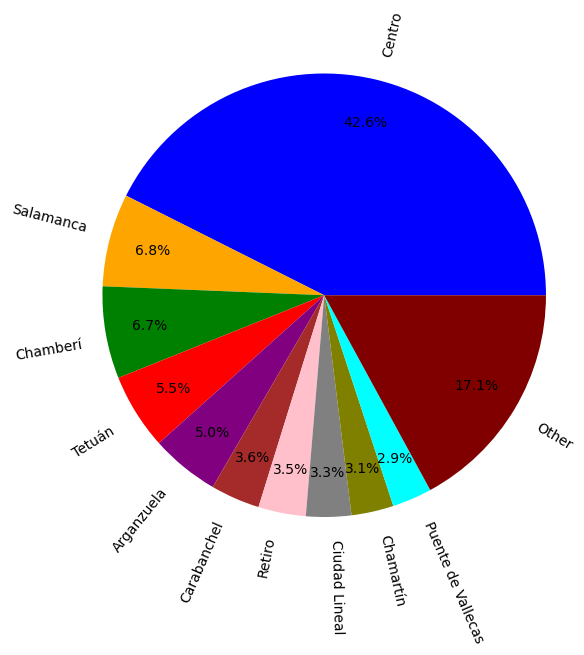

In [72]:
# Count how many listings are in each neighbourhood

nghood_count = df_new['neighbourhood_group_cleansed'].value_counts()
print(nghood_count.head(10))
print('The top 10 neighbourhoods account for {:2.2%} of the total listings'.format(nghood_count.head(10).sum()/df.shape[0]))

# Plot a pie chart with the percentaje of the top 10 neibourhoods

# Group the other neighbourhoods in an "other" category
pie_nghood = nghood_count
pie_nghood['Other'] = nghood_count[10:].sum()
pie_nghood = pie_nghood[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1]]

# Plot
plt.pie(pie_nghood.tolist(), labels=pie_nghood.keys().tolist(), autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'maroon'], pctdistance=0.8, radius=1.5, rotatelabels=True)
plt.show() 

As the data shows, most listings are in Centro, that makes sense as it's the most turistic part of the city.

neighbourhood_cleansed
Embajadores        3010
Universidad        2349
Palacio            1854
Sol                1329
Justicia           1285
Cortes             1051
Trafalgar           551
Palos de Moguer     422
Guindalera          408
Goya                390
Name: count, dtype: int64
The top 10 neighbourhoods account for 82.93% of the total listings


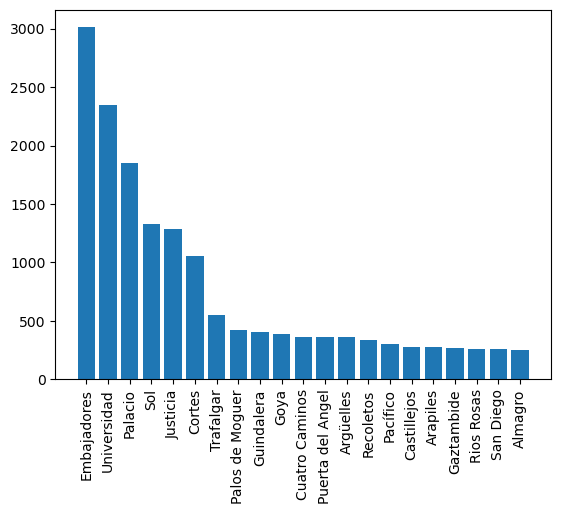

In [73]:
# Break down to next level neighbourhood

nghood_2_count = df_new['neighbourhood_cleansed'].value_counts()
print(nghood_2_count.head(10))
print('The top 10 neighbourhoods account for {:2.2%} of the total listings'.format(nghood_count.head(10).sum()/df.shape[0]))

# Plot a bar chart with the neighbourhoods that host more that 250 listings

pie_nghood = nghood_2_count[nghood_2_count>=250]

# Plot
plt.bar(pie_nghood.keys().tolist(), pie_nghood.tolist())
plt.xticks(rotation=90)
plt.show() 

The graph shows that there are 6 neighbourhoods that have many more listings than the rest:
* Embajadores
* Universidad
* Palacio
* Sol
* Justicia
* Cortes

Now the question of the hosts (i.e. who published each listing) is analyzed

In [74]:
# Variable analysis on the host_id

owner_count = df['host_id'].value_counts()
display(owner_count.describe())

print('The top 10 owners account for {:2.2%} of the total listings'.format(owner_count.head(10).sum()/df.shape[0]))

count    12466.000000
mean         2.049013
std          6.871960
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        291.000000
Name: count, dtype: float64

The top 10 owners account for 7.37% of the total listings


There are 12.466 different hosts in the dataset. The distibution of the data reveals that:
* Most of the hosts have only 1 listing (the minimun, 25%, 50% and 75% of the data is this value)
* The max listings for a host is 291

In [75]:
# Define bins to get ranges of listings per host

bins = [0, 1, 10, 50, 100, 300]
owner_bins = pd.cut(owner_count.tolist(), bins=bins)
print(owner_bins.value_counts())

(0, 1]        9418
(1, 10]       2817
(10, 50]       202
(50, 100]       19
(100, 300]      10
Name: count, dtype: int64


Considering 5 posible levels of hosts, it's interesting to create a new categorical variable in the dataframe to study the impact of the type of host:

|Bin|Category|
|---|--------|
|(0, 1]|single_property|
|(1, 10]|small_owner|
|(10, 50]|mid_owner|
|(50, 100]|big_owner|
|(100, 300]|massive_owner|

In [76]:
# Define the categories

host_types = ['single_property', 'small_owner', 'mid_owner', 'big_owner', 'massive_owner']

# Create a dictionary with the categories and the host_id
host_types_matrix = dict(pd.cut(owner_count, bins=bins, labels=host_types))

def change_dtype_dict(d):
    '''
    INPUT
    d -> a source dictionary to change datatype of key to int

    OUTPUP
    dict -> a new dictionary with the new datatype

    '''

    dict={}
    dict = {int(k):v for k,v in d.items()}
    
    return dict

host_types_matrix = change_dtype_dict(host_types_matrix)

# Create a new column with 'category" dtype in the dataframe
# the map method will map each host_id with the corresponding category using the dictionary defined above
df_new['host_type'] = df_new['host_id'].map(host_types_matrix)
df_new.shape

C:\Users\Toni\AppData\Local\Temp\ipykernel_13524\1802470110.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['host_type'] = df_new['host_id'].map(host_types_matrix)


(25543, 72)

The categorization is used to calculate how many listings are published by each category

host_type
single_property    9418
small_owner        8899
mid_owner          3976
massive_owner      1882
big_owner          1368
Name: count, dtype: int64


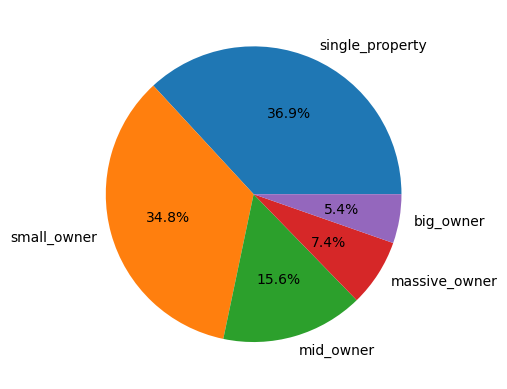

In [77]:
# Count how many listings are in each host category
host_types_count = df_new['host_type'].value_counts()
print(host_types_count)

# Plot a pie chart with the results
plt.pie(host_types_count.tolist(), labels=host_types_count.keys().tolist(), autopct='%1.1f%%')
plt.show()

Almost 13% of the listings are published by hosts that have more than 100 listings. This hosts are likely professionals running a business.

## Question 2: What factors influence the reviews?
Whats the average score per neighbourhood? Different room types have different scores?

There are 7 columns related to reviews and scores:
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value

Before dealing with the underlying factors of each score, let's analyze how each of the score impact in the general rating.

In [78]:
# Extract the scores columns

df_scores = df_new[[
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
    ]]

print('The extracted dataframe has {} rows and {} columns'.format(df_scores.shape[0], df_scores.shape[1]))
# Are there NaN values in the scores?
print('The scores variables have this percentaje of NaN:\n{}'.format(df_scores.isnull().mean()))

The extracted dataframe has 25543 rows and 7 columns
The scores variables have this percentaje of NaN:
review_scores_rating           0.208550
review_scores_accuracy         0.208668
review_scores_cleanliness      0.208668
review_scores_checkin          0.208629
review_scores_communication    0.208589
review_scores_location         0.208707
review_scores_value            0.208746
dtype: float64


Almost 21% of the values are missing. The percentajes are not the same, but it's probable that the rows without any value in rating will not have values in the remaining columns.

In [79]:
# Drop rows that have NaN in any of the columns
df_scores.dropna(inplace=True, axis=0)
print('After deleting the rows with NaN values the dataframe has {} rows and {} columns'.format(df_scores.shape[0], df_scores.shape[1]))

After deleting the rows with NaN values the dataframe has 20206 rows and 7 columns


C:\Users\Toni\AppData\Local\Temp\ipykernel_13524\3322967166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores.dropna(inplace=True, axis=0)


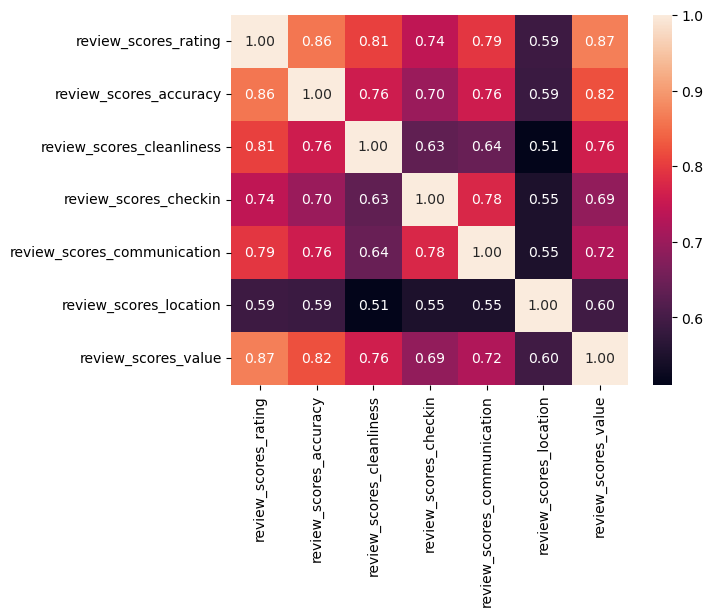

In [80]:
# heatmap displaying the correlation  matrix
sns.heatmap(df_scores.corr(), annot=True, fmt=".2f");

There is a signficant difference between the correlation of the different scores. Apparently the location score is less related to the remaining scores. Whereas the value and the accuracy are hightly correlated with the rating.

In [81]:
# Location ranking for each neighbourhood

df_location = df_new[['review_scores_location','neighbourhood_group_cleansed']]
display(df_location.describe())
df_location.groupby(['neighbourhood_group_cleansed']).mean().sort_values('review_scores_location', ascending=False)

,review_scores_location
count,20212.000000
mean,4.746825
std,0.394859
min,1.000000
25%,4.670000
50%,4.880000
75%,4.990000
max,5.000000


,review_scores_location
neighbourhood_group_cleansed,
Centro,4.852432
Chamberí,4.823084
Salamanca,4.821336
Retiro,4.781110
Moncloa - Aravaca,4.779344
Barajas,4.762536
Arganzuela,4.755906
Chamartín,4.704853
Fuencarral - El Pardo,4.634721


As expected the closer to the city center the hight the location score

In [82]:
# Rating ranking for each room_type

df_room_type = df_new[['review_scores_rating','room_type']]
display(df_location.describe())
ranking_room = df_room_type.groupby(['room_type']).mean().sort_values('review_scores_rating', ascending=False)
display(ranking_room)

,review_scores_location
count,20212.000000
mean,4.746825
std,0.394859
min,1.000000
25%,4.670000
50%,4.880000
75%,4.990000
max,5.000000


,review_scores_rating
room_type,
Private room,4.651647
Entire home/apt,4.637635
Hotel room,4.611183
Shared room,4.523529


<BarContainer object of 4 artists>

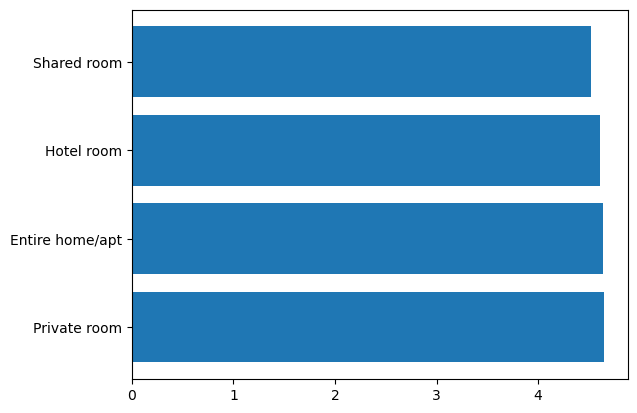

In [83]:
plt.barh(ranking_room.index.values, ranking_room['review_scores_rating'])

There is little difference between room types, but they private room has a slightly higher rating that the shared room.

# Question 3: Can the price be predicted?
What's the average price? How much can a host earn?

In [84]:
# Analysis of the price variable

display(df_new[['price']].describe())
display(df_new[['price']].dtypes)

,price
count,21734
unique,650
top,$60.00
freq,309


price    object
dtype: object

The price column is stored as an object, the first step is to convert this column to a float to perform calculations.

In [85]:
# Store the price as string to perform replacements
df_new['price'] = df_new['price'].astype('str')

# Get rid of $ sign and , as thousands separator
df_new['price'] = df_new['price'].map(lambda x: x.lstrip('$').replace(',',''))

# Convert to float
df_new['price'] = df_new['price'].astype('float')
display(df_new['price'].describe())
display(df_new.shape)


C:\Users\Toni\AppData\Local\Temp\ipykernel_13524\1330451187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['price'] = df_new['price'].astype('str')
C:\Users\Toni\AppData\Local\Temp\ipykernel_13524\1330451187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['price'] = df_new['price'].map(lambda x: x.lstrip('$').replace(',',''))
C:\Users\Toni\AppData\Local\Temp\ipykernel_13524\1330451187.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

count    21734.000000
mean       129.016058
std        270.553640
min          8.000000
25%         59.000000
50%         90.000000
75%        137.000000
max      21000.000000
Name: price, dtype: float64

(25543, 72)

The data has 3,809 NaN values that should be removed,

In [86]:
# Outliner analysis

# Define bins to get ranges of pricing

bins = [0, 10, 100, 1000, 10000, 100000]
price_bins = pd.cut(df_new['price'], bins=bins).value_counts().sort_index()
price_data = pd.DataFrame(price_bins)
price_data['percentaje'] = price_data['count']/df_new.shape[0]
price_data

,count,percentaje
price,,
"(0, 10]",29,0.001135
"(10, 100]",12534,0.490702
"(100, 1000]",9072,0.355166
"(1000, 10000]",98,0.003837
"(10000, 100000]",1,0.000039


The average price is $129 per night. Almost 60% of the listins have a price between $10 and $100 per night.

To calculate how much can earn the following assumptions are considered:
* The price per night will be the average price
* To calculate the bookings, the column 'availability_30' is used
* This column provides the availability for the next 30 days, for this analysis it will be considered that the days that is not available is due to bookings
* Then, the average bookings per month will equal to 30 - availability_30

In [87]:
# Average reviews per month

display(df_new['availability_30'].describe())
average_bookings_month = 30 - round(df_new['availability_30'].mean())
print(average_bookings_month)

count    25543.000000
mean         8.805544
std          9.907230
min          0.000000
25%          0.000000
50%          5.000000
75%         16.000000
max         30.000000
Name: availability_30, dtype: float64

21


In [88]:
# Possible earnings per month

average_price = df_new['price'].mean()
print('A host could earn an average of ${:.2f} per month'.format(average_price*average_bookings_month))

A host could earn an average of $2709.34 per month


In [89]:
# Categorical variables

cat_df = df_new.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
display(cat_cols_lst)

Index(['listing_url', 'last_scraped', 'source', 'name',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable', 'host_type'],
      dtype='object')

Many of the previous columns can be droped for this analysis. And two of the variables are boolean and it would be better to change the data type. Another two are percentajes.

In [90]:
# Drop not needed columns

columns_to_drop = [
    'listing_url', # URL of the listing in the AirBnB site. It would have a category for each listing delivering no value for modeling
    'last_scraped', # date when the data was scraped, no value for modeling
    'source', # tells if the data was scraped or comes from a previous scrap. No value for modeling
    'name', # name of the listing. Again it will have a unique value for each listing
    'neighborhood_overview', # the description provided by the host of the neighbourhood. It's a text field and it doesn't contain categories
    'picture_url', # not categories, just the URL of a picture
    'host_url', # no categories, the URL of the host profile in AirBnB
    'host_name', # The name of the host, no categories
    'host_since', # Date when the host joined AirBnB, no categories
    'host_location', # Location where the host is based, not related with the listing
    'host_about', # description of the host, no categories
    'host_response_time', # time the host takes to reply a guest. Not a category
    'host_thumbnail_url', # URL of the thumnail of the picture of the host
    'host_picture_url', # URL of the picture of the host
    'host_neighbourhood', # the neighbourhood as indicated by the host. This information is standardized in the field 'neighbourhood_cleansed'
    'host_verifications', # list of phones and emails of the hosts
    'host_has_profile_pic', # boolean indicating if the host has a picture
    'host_identity_verified', # boolean indicating if the host is verified
    'neighbourhood', # the neighbourhood as indicated by the host. This information is standardized in the field 'neighbourhood_cleansed' 
    'amenities', # this column only contains '[]' hence even though it's empty it wasn't detected as only NaN
    'has_availability', # avalilability at the time of scraping. Can change overtime and it's not a category
    'calendar_last_scraped', # date when the calendar was scraped
    'first_review', # date of the first review
    'last_review', #date of the last review
    'license' # the license of the host, not a category
    ]

df_new_clean = df_new.drop(columns=columns_to_drop)


df_new_clean.shape

(25543, 47)

In [91]:
# change values of boolean variables

df_new_clean[['host_is_superhost', 'instant_bookable']] = df_new_clean[['host_is_superhost', 'instant_bookable']].replace({'t':True, 'f':False}).astype('bool')
df_new_clean[['host_is_superhost', 'instant_bookable']]

,host_is_superhost,instant_bookable
0,True,False
1,False,False
2,False,False
3,True,False
4,False,False
...,...,...
25538,False,False
25539,False,False
25540,False,False
25541,False,False


In [92]:
# change columns to percentaje

df_new_clean[['host_response_rate', 'host_acceptance_rate']] = df_new_clean[['host_response_rate', 'host_acceptance_rate']].replace('%.*', '', regex=True).astype('float')/100
df_new_clean[['host_response_rate', 'host_acceptance_rate']]


,host_response_rate,host_acceptance_rate
0,1.0,0.78
1,NaN,0.00
2,NaN,NaN
3,0.0,0.82
4,NaN,1.00
...,...,...
25538,1.0,1.00
25539,1.0,1.00
25540,1.0,1.00
25541,1.0,1.00


The 'bathrooms_text' is a text variable that indicates the number of bathrooms. It could be interesting to extract this information and transform this into a numeric variable

In [93]:
df_new_clean['bathrooms_text']

0        1 private bath
1                1 bath
2                1 bath
3             1.5 baths
4                1 bath
              ...      
25538           2 baths
25539           3 baths
25540           2 baths
25541           2 baths
25542            1 bath
Name: bathrooms_text, Length: 25543, dtype: object

Apparently the content is a number followed by a description of the bathroom. This information would be more useful if split in a numeric variable and a categorical variable.

In [94]:
# Replace the entries without number with entries with a number, to help the split
df_new_clean['bathrooms_text'] = df_new_clean['bathrooms_text'].replace({'Private half-bath':'1 private half-bath', 'Shared half-bath':'1 shared half-bath', 'Half-bath':'1 half-bath'})

# Split the column in two new columns and change the type of number
df_new_clean[['bathrooms_number', 'bathroom_type']] = df_new_clean['bathrooms_text'].str.split(' ', n=1, expand=True)
df_new_clean['bathrooms_number'] = df_new_clean['bathrooms_number'].astype('float')

# Drop the old column
df_new_clean.drop(columns='bathrooms_text', inplace=True)

Now let's standardize the values of bathroom_type

In [95]:
# Replace plural entities with singular entities
df_new_clean['bathroom_type'] = df_new_clean['bathroom_type'].replace({'baths':'bath', 'shared baths':'shared bath'})

df_new_clean['bathroom_type'].value_counts()

bathroom_type
bath                 18469
shared bath           5442
private bath          1435
half-bath              137
shared half-bath        42
private half-bath        3
Name: count, dtype: int64

In [96]:
df_new_clean['bathroom_type'].value_counts()

bathroom_type
bath                 18469
shared bath           5442
private bath          1435
half-bath              137
shared half-bath        42
private half-bath        3
Name: count, dtype: int64

After cleaning the categorical variables this is the list of categorical columns

In [97]:
cat_df = df_new_clean.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
display(cat_cols_lst)

Index(['neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'host_type', 'bathroom_type'],
      dtype='object')

Before proceeding to the modeling there are many numeric variables that should also be dropped

In [98]:
# Not Object columns cleaning

columns_to_drop = [
    'id', # this is a numeric ID of the listing, not needed for modeling
    'scrape_id', # ID for the scrape in which the data was obtained
    'host_id', # ID of the host
    'host_listings_count', # number of listings calculated by AirBnB (including other geographies)
    'host_total_listings_count', # number of listings calculated by AirBnB (including other geographies)
    'latitude', # This parameter is included in 'neighbourhood_cleansed'
    'longitude', # This parameter is included in 'neighbourhood_cleansed'
    'minimum_nights', # All variables related to availability can be removed
    'maximum_nights', # All variables related to availability can be removed
    'minimum_minimum_nights', # All variables related to availability can be removed
    'maximum_minimum_nights', # All variables related to availability can be removed
    'minimum_maximum_nights', # All variables related to availability can be removed
    'maximum_maximum_nights', # All variables related to availability can be removed
    'minimum_nights_avg_ntm', # All variables related to availability can be removed
    'maximum_nights_avg_ntm', # All variables related to availability can be removed
    'availability_30', # All variables related to availability can be removed
    'availability_60', # All variables related to availability can be removed
    'availability_90', # All variables related to availability can be removed
    'availability_365', # All variables related to availability can be removed
    'number_of_reviews_ltm', # This is included in 'number_of_reviews'
    'number_of_reviews_l30d', # This is included in 'number_of_reviews
    'calculated_host_listings_count', # The number of listings calculated in this datasheet
    'calculated_host_listings_count_entire_homes', # The number of listings calculated in this datasheet
    'calculated_host_listings_count_private_rooms', # The number of listings calculated in this datasheet
    'calculated_host_listings_count_shared_rooms', # The number of listings calculated in this datasheet
    ]

df_new_clean.drop(columns=columns_to_drop, inplace=True)

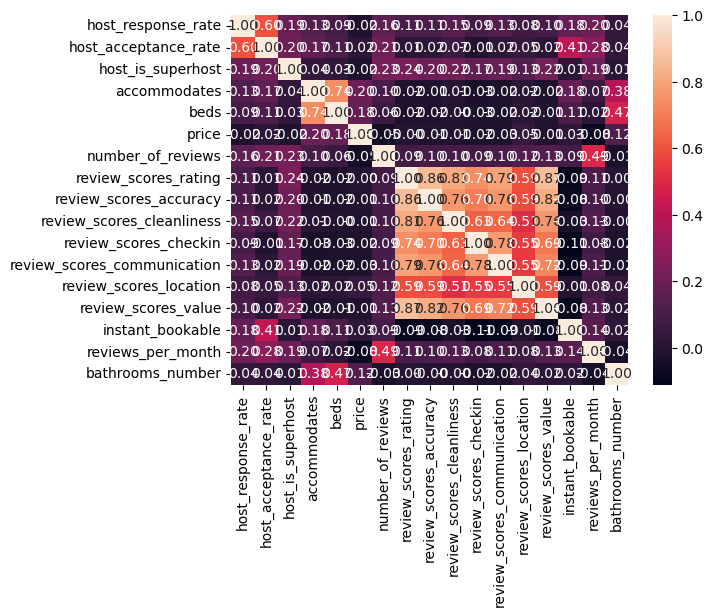

In [99]:
# Correlation matrix of numeric variables
sns.heatmap(df_new_clean.corr(numeric_only = True), annot=True, fmt=".2f");

The correlation matrix shows that only the beds, the accomodates and the bathroom number have some correlation with the price

In [100]:
# Modeling the price

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    df = pd.get_dummies(df, drop_first = True, dummy_na=dummy_na, columns=cat_cols)
    
    return df
    

# Drop the rows with missing price
df_new_clean = df_new_clean.dropna(subset=['price'], axis=0)

# Create dummy categorical variables
df_new_clean= create_dummy_df(df_new_clean, cat_cols_lst, False)

# For the quantitative variables, fill the NaN with the mean of the column
df_new_clean = df_new_clean.apply(lambda col: col.fillna(col.mean()), axis=0)

# Split the dataset in a response and explanatory variables
X = df_new_clean.drop('price', axis=1)
y = df_new_clean['price']

# Create train and test sets with a proportion of 70% train 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Instantiate and fit the model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Make predictions using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

# Model scoring
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [101]:
print('The test score is {:2.2} and the train score is {:2.2}'.format(test_score, train_score))

The test score is 0.056 and the train score is 0.093
